Given data about an instrumental variable, find the effect. X is the treatment, W the confounder, Y the outcome, and Z the instrument. Use homework_4.1.csv. 


Question 1
As in the explanation, try averaging the ﻿Y﻿ difference and ﻿X﻿ difference (over ﻿W﻿ and ﻿Z﻿) in two ways: 

Subtract the average ﻿Y﻿ value for ﻿Z equals 1﻿ and ﻿Z equals 0﻿. Subtract the average ﻿X﻿ value for ﻿Z equals 1﻿ and ﻿Z equals 0﻿. Divide the two. 
Find the average ﻿Y﻿ value for ﻿Z equals 1﻿ and ﻿Z equals 0﻿ for a narrow range of ﻿W﻿. Find the average ﻿X﻿ value for ﻿Z equals 1﻿ and ﻿Z equals 0﻿ for the same narrow range of ﻿W﻿. Take the ratio to find the effect. Then average this over all the ranges of ﻿W﻿. 


For the first item, the effect is closest to: 

Option A
1

Option B
2

Option C
1.5

Option D
0.5 


Question 2
Did you need to know W to do this? 

Option A
No 

Option B
Yes 


Given student data involving test scores (﻿X﻿), a cutoff, and an outcome (Y), which measures whether the students got into college (as in the example in the text), determine whether the math course helps students get into college in each dataset. Use datasets homework_4.2.a and homework_4.2.b. 


Question 3
In that dataset, is ﻿Y﻿ increasing or decreasing before the cutoff? 

Option A
Decreasing 

Option B
Increasing

Question 4
Given a cutoff score of 80, which dataset seems most likely to involve a nonzero linear term, allowing ﻿Y﻿ to relate linearly to ﻿X﻿ before and after the cutoff? 

Option A
Dataset a (﻿X﻿, ﻿Y﻿)

Option B
Dataset b (﻿X 2﻿, ﻿Y 2﻿)

Question 5
Is ﻿Y﻿'s slope higher or lower after the cutoff compared with before? 

Option A
Higher 

Option B
Lower 

In [1]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd

# 'homework_4.1.csv' 데이터셋을 로드합니다.
# 첫 번째 열이 인덱스이므로 index_col=0으로 지정합니다.
df1 = pd.read_csv('homework_4.1.csv', index_col=0)

# Z=1일 때와 Z=0일 때의 Y의 평균을 각각 계산합니다.
avg_y_z1 = df1[df1['Z'] == 1]['Y'].mean()
avg_y_z0 = df1[df1['Z'] == 0]['Y'].mean()

# Z=1일 때와 Z=0일 때의 X의 평균을 각각 계산합니다.
avg_x_z1 = df1[df1['Z'] == 1]['X'].mean()
avg_x_z0 = df1[df1['Z'] == 0]['X'].mean()

# Y의 평균 차이를 계산합니다 (분자).
diff_y = avg_y_z1 - avg_y_z0

# X의 평균 차이를 계산합니다 (분모).
diff_x = avg_x_z1 - avg_x_z0

# Wald 추정량을 사용하여 인과 효과를 계산합니다.
causal_effect = diff_y / diff_x

print(f"계산된 인과 효과: {causal_effect:.4f}")

계산된 인과 효과: 1.5619


/tmp/ipykernel_9821/2598342031.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_a = df_a.groupby('x_bins')['Y'].mean().reset_index()
/tmp/ipykernel_9821/2598342031.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_b = df_b.groupby('x_bins')['Y'].mean().reset_index()


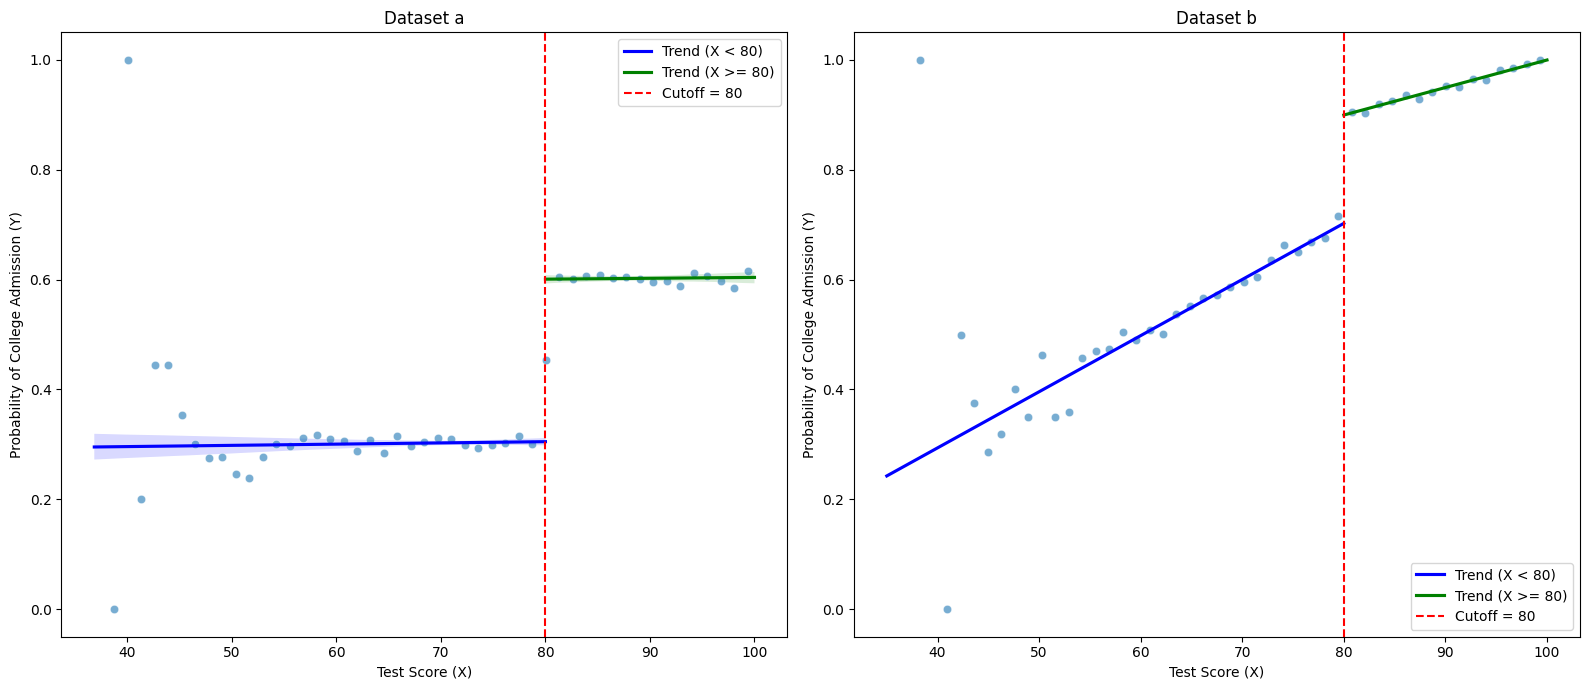

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터셋 로드
df_a = pd.read_csv('homework_4.2.a.csv', index_col=0)
df_b = pd.read_csv('homework_4.2.b.csv', index_col=0)

# 데이터셋 b의 열 이름을 a와 통일합니다.
df_b.rename(columns={'X2': 'X', 'Y2': 'Y'}, inplace=True)

# 컷오프 점수 설정
cutoff = 80

# --- 데이터 시각화 준비 (Binned Scatter Plot) ---
# 데이터셋 a
bins_a = np.linspace(df_a['X'].min(), df_a['X'].max(), 50)
df_a['x_bins'] = pd.cut(df_a['X'], bins=bins_a)
binned_a = df_a.groupby('x_bins')['Y'].mean().reset_index()
binned_a['x_mid'] = binned_a['x_bins'].apply(lambda x: x.mid)

# 데이터셋 b
bins_b = np.linspace(df_b['X'].min(), df_b['X'].max(), 50)
df_b['x_bins'] = pd.cut(df_b['X'], bins=bins_b)
binned_b = df_b.groupby('x_bins')['Y'].mean().reset_index()
binned_b['x_mid'] = binned_b['x_bins'].apply(lambda x: x.mid)


# --- 두 데이터셋 그래프 그리기 ---
# 전체 그래프의 크기를 설정합니다.
plt.figure(figsize=(16, 7))

# 첫 번째 그래프 (데이터셋 a)
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 위치
sns.regplot(x='X', y='Y', data=df_a[df_a['X'] < cutoff], scatter=False, color='blue', label='Trend (X < 80)')
sns.regplot(x='X', y='Y', data=df_a[df_a['X'] >= cutoff], scatter=False, color='green', label='Trend (X >= 80)')
sns.scatterplot(x='x_mid', y='Y', data=binned_a, alpha=0.6)
plt.axvline(x=cutoff, color='r', linestyle='--', label='Cutoff = 80')
plt.title('Dataset a')
plt.xlabel('Test Score (X)')
plt.ylabel('Probability of College Admission (Y)')
plt.legend()

# 두 번째 그래프 (데이터셋 b)
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 위치
sns.regplot(x='X', y='Y', data=df_b[df_b['X'] < cutoff], scatter=False, color='blue', label='Trend (X < 80)', ci=None)
sns.regplot(x='X', y='Y', data=df_b[df_b['X'] >= cutoff], scatter=False, color='green', label='Trend (X >= 80)', ci=None)
sns.scatterplot(x='x_mid', y='Y', data=binned_b, alpha=0.6)
plt.axvline(x=cutoff, color='r', linestyle='--', label='Cutoff = 80')
plt.title('Dataset b')
plt.xlabel('Test Score (X)')
plt.ylabel('Probability of College Admission (Y)')
plt.legend()

# 그래프를 화면에 보여줍니다.
plt.tight_layout() # 그래프 간격 자동 조정
plt.show()

In [4]:
# --- Question 3 분석 ---
# 데이터셋 a에서 컷오프(80) 이전의 기울기를 계산합니다.
df_a_before = df_a[df_a['X'] < cutoff]
model_before_a = LinearRegression()
model_before_a.fit(df_a_before[['X']], df_a_before['Y'])
slope_before_a = model_before_a.coef_[0]
print(f"Dataset a에서 컷오프 이전의 기울기: {slope_before_a:.4f}")

# --- Question 5 분석 ---
# 데이터셋 a에서 컷오프(80) 이후의 기울기를 계산합니다.
df_a_after = df_a[df_a['X'] >= cutoff]
model_after_a = LinearRegression()
model_after_a.fit(df_a_after[['X']], df_a_after['Y'])
slope_after_a = model_after_a.coef_[0]
print(f"Dataset a에서 컷오프 이후의 기울기: {slope_after_a:.4f}")

Dataset a에서 컷오프 이전의 기울기: 0.0002
Dataset a에서 컷오프 이후의 기울기: 0.0002


In [8]:
import pandas as pd
import numpy as np

# Load the dataset for Question 1
df1 = pd.read_csv('homework_4.1.csv', index_col=0)

# Define a function to calculate the Wald estimator
def wald_estimator(df):
    df_z1 = df[df['Z'] == 1]
    df_z0 = df[df['Z'] == 0]
    if len(df_z1) == 0 or len(df_z0) == 0:
        return np.nan 
    diff_y = df_z1['Y'].mean() - df_z0['Y'].mean()
    diff_x = df_z1['X'].mean() - df_z0['X'].mean()
    if diff_x == 0:
        return np.nan
    return diff_y / diff_x

# Create 10 bins for the confounder W
df1['w_bins'] = pd.cut(df1['W'], bins=10)

# Group by the W bins and apply the Wald estimator function
binned_effects = df1.groupby('w_bins').apply(wald_estimator)

# Calculate the final effect by averaging the effects from each bin
final_effect = binned_effects.mean()

print("Causal effects calculated for each bin of W:")
print(binned_effects)
print(f"\nFinal Average Causal Effect: {final_effect:.4f}")

Causal effects calculated for each bin of W:
w_bins
(-3.311, -2.495]     1.146167
(-2.495, -1.686]     1.838725
(-1.686, -0.877]     1.439628
(-0.877, -0.0687]    1.534002
(-0.0687, 0.74]      1.572354
(0.74, 1.549]        1.508410
(1.549, 2.357]       1.311352
(2.357, 3.166]       1.514965
(3.166, 3.975]      -3.688723
(3.975, 4.783]            NaN
dtype: float64

Final Average Causal Effect: 0.9085


/tmp/ipykernel_9821/4153957757.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_effects = df1.groupby('w_bins').apply(wald_estimator)
/tmp/ipykernel_9821/4153957757.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  binned_effects = df1.groupby('w_bins').apply(wald_estimator)


/tmp/ipykernel_9821/2557580172.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_plot_data = df_subset.groupby('x_bins').agg({'X': 'mean', 'Y': 'mean'}).dropna()
/home/abcbbong/tfenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


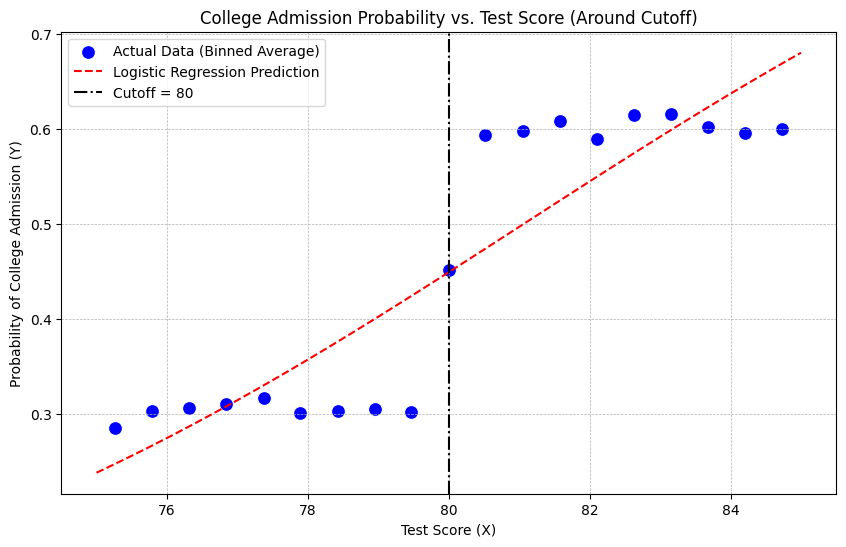

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the dataset
df_a = pd.read_csv('homework_4.2.a.csv', index_col=0)

# Filter data to a small range around the cutoff of 80
cutoff = 80
plot_range = 5
df_subset = df_a[(df_a['X'] >= cutoff - plot_range) & (df_a['X'] <= cutoff + plot_range)].copy()

# Create bins for the X variable to make the scatter plot readable
bins = np.linspace(df_subset['X'].min(), df_subset['X'].max(), 20)
df_subset['x_bins'] = pd.cut(df_subset['X'], bins=bins)
binned_plot_data = df_subset.groupby('x_bins').agg({'X': 'mean', 'Y': 'mean'}).dropna()

# Fit a logistic regression model
X = df_subset[['X']]
y = df_subset['Y']
model = LogisticRegression()
model.fit(X, y)

# Create a smooth range of X values for plotting the prediction
x_fit = np.linspace(df_subset['X'].min(), df_subset['X'].max(), 300).reshape(-1, 1)
y_fit_prob = model.predict_proba(x_fit)[:, 1]

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=binned_plot_data, color='blue', s=100, label='Actual Data (Binned Average)')
plt.plot(x_fit, y_fit_prob, color='red', linestyle='--', label='Logistic Regression Prediction')
plt.axvline(x=cutoff, color='black', linestyle='-.', label=f'Cutoff = {cutoff}')
plt.title('College Admission Probability vs. Test Score (Around Cutoff)')
plt.xlabel('Test Score (X)')
plt.ylabel('Probability of College Admission (Y)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('logistic_vs_actual_plot.png')